# Data Analytics Fall 2025 &mdash; Exercises 3

### XXXXX XXXXX XXXXX


In [ ]:
import os
os.system('/bin/bash /home/varpha/dan/config.sh');

## Greetings from Harri

You don't need to lose your goodnight sleep because of problem 5. I just left the AI-generated stuff (part c) there, and it can look frightening... But you should concentrate on the very first sentence of the problem: *"Your task is..."*. I'm genuinely interested in the answers, and I don't know them well beforehand myself!

## How to submit my solutions?

Open a Terminal tab (e.g. <tt>File $\rightarrow$ New $\rightarrow$ Terminal</tt>, copy-paste the following into the Terminal command prompt, and press enter:
<pre>
  /home/varpha/dan/menu.py
</pre>


## Problem 1. Gitlab (part 1/2)

a) Please create a private [LabraNet GitLab](https://gitlab.labranet.jamk.fi) project named `data-analytics-fall-2024` for this course.

  + See e.g. [these instructions](https://docs.gitlab.com/ee/user/project/).

  > <span style="font-size:0.8em;"><b>A clarification:</b> There is the public GitLab (gitlab.com) server available for anyone, and then we have our own LabraNet GitLab server available for LabraNet users. The public one sometimes has better documentation.</span>


b) 
   + Add user `x1234` (@x12341) as a **maintainer** for your project.
   + (Only maintainers can push to main branch. This gives Harri the possibility to modify your project if needed.)
   + See e.g. [these instructions](https://docs.gitlab.com/ee/user/project/members/#add-users-to-a-project).

Harri will let you know how it went in a Teams thread. Easy one point for all!

**Why** are we doing this:
   - It's good to get acquainted with a <tt>git</tt> instance (such as GitLab). Nowadays it's a standard in data science (among many other fields).
   - It's good to have a backup system available, in case the hub or vpn or something fails at a critical moment.
   - More details in our Teams sessions and our Theory notes!


<h2 style="color: green;"> Problem 1. Gitlab (part 1/2) - DONE </h2>

## Problem 2. Simulation.

A seminar runs a regular session with 8 spots on it.
The probability that a participant turns up for the session is 0.91.
What is the smallest number of spots that the seminar should sell to ensure
that the probability that the session is full (i.e. 8 or more participants turn up)
is bigger than 0.976? Write some simulation code to establish your answer.


<h2 style="color: green;"> Problem 2. Solution: </h2>

### Understanding the problem

The seminar has **8 spots,** and each participant has a **91% probability of showing up.** We want to know the **smallest number of spots** (let's call it n_spots_sold) that the seminar should sell to ensure that the **probability of the session being full (i.e., 8 or more participants showing up)** is at least **0.976 (or 97.6%).**

To clarify:

* The seminar must have **at least 8 participants** attending for the session to be considered **"full."**
* Probability of showing up **(0.91), ** for each participant who buys a spot, there is a 91% chance that they will show up.
* I am trying to figure out the **minimum number of spots** that need to be sold to ensure there's a **high probability (more than 97.6%)** that at least 8 participants show up.
* Simulation: I will repeatedly simulate several participants buying spots and showing up, then count how often the session is full.
* Ensure full session (8 spots filled) so I will determine the smallest number of spots sold so that the session is full (i.e., 8 or more people show up)

In [6]:
import numpy as np

# Setting parameters
p_show_up = 0.91  # Probability that a participant shows up
n_spots_needed = 8  # Number of spots needed to fill the session
target_prob = 0.976  # Target probability of having a full session
n_simulations = 10000  # Number of simulations to run

def simulate_full_sessions(n_sold_spots):
    """ Simulates the number of participants showing up for a given number of sold spots.
    Args:
        n_sold_spots (int): Number of spots sold for the seminar.
    Returns:
        proportion_full (float): Proportion of times the session was full (8 or more participants).
    """
    # Run simulations to determine how often 8 or more participants show up
    full_sessions = 0
    
    for _ in range(n_simulations):
        # Simulate whether each participant shows up for this session
        participants = np.random.binomial(1, p_show_up, n_sold_spots)
        n_show_up = np.sum(participants)  # Count how many participants showed up
        
        # Check if the session is full (i.e., 8 or more participants showed up)
        if n_show_up >= n_spots_needed:
            full_sessions += 1
    
    # Calculate the proportion of full sessions
    proportion_full = full_sessions / n_simulations
    return proportion_full

# Start with the minimum number of spots sold (which is 8)
n_sold_spots = n_spots_needed

# Iterate to find the minimum number of spots to sell so the session is full with >0.976 probability
while True:
    proportion_full = simulate_full_sessions(n_sold_spots)
    
    if proportion_full > target_prob:
        break
    
    n_sold_spots += 1  # Increase the number of spots sold

# Output the result
n_sold_spots, proportion_full

(11, 0.9872)

In [12]:
# 033[1m: This is the ANSI escape code to start bold formatting. 
# \033[0m: This resets the text formatting back to normal.
print(f"To ensure the seminar session is full (minimum 8 participants), at least \033[1m{n_sold_spots}\033[0m spots should be sold.\n")

To ensure the seminar session is full (minimum 8 participants), at least 11 spots should be sold.




## Problem 3. Matplotlib & Seaborn study report

Please spend about 60 to 90 minutes of effective time studying:

- [Mika's material about plotting](https://dan-spring2024-varpha-88169c3779a1710ff05907c99be44ae1d38051dc7.pages.labranet.jamk.fi/Materials/12-Datan_visualisointi_eng/)
- [This article](https://medium.com/towards-data-science/demystifying-matplotlib-3895ab229a63), found in <tt>dan/public/exrc_03</tt> too.

Then apply what you've learned in the next two problems. Write a separate problem 3 answer about your experiences in studying and learning.

<h2 style="color: green;"> Problem 3. Solution: </h2>

As a student new to **Matplotlib** and **Seaborn**, studying Mika's material and the Medium article titled *"Demystifying Matplotlib"* gave me valuable insights into plotting in Python. Here are my key takeaways:

### Understanding Matplotlib’s Dual Interface

The most confusing aspect I encountered while learning Matplotlib was the coexistence of **two approaches**: the **pyplot** interface and the **object-oriented style**. 

- The **pyplot approach** allows me to quickly generate plots with minimal code. It’s convenient when I want to create basic visualizations. For instance:
  
  ```python
  import matplotlib.pyplot as plt
  import numpy as np

  data = np.arange(5, 10)
  plt.plot(data)

This creates a plot in just one line, which feels easy for interactive work. However, I also realized its limitations when I wanted more customization.

On the other hand, the **object-oriented style** gave me more control over the plot. Here’s how I created the same plot but with more flexibility:

```python
import matplotlib.pyplot as plt
import numpy as np

data = np.arange(5, 10)
fig, ax = plt.subplots()
ax.plot(data)

I had to explicitly manage the Figure and Axes objects. At first, it seemed more complex, but it makes sense when creating more elaborate plots or working in bigger projects.

### Plot Nomenclature: Figuring Out Figures and Axes

One of the biggest revelations for me was understanding the basic **anatomy of a plot.** Matplotlib has a hierarchical structure, where:

**- Figure:** Represents the canvas (like a blank sheet).
**- Axes:** Represents the actual plot (the graph itself).
**- Axis:** Refers to the numerical values and tick marks on the x- or y-axis.

This helped me clarify a lot of confusion I had. For instance, I often mixed up **"Axes"** and **"Axis"** before, thinking they were the same thing! Now, it’s clear that **Axes** is the space where the data is plotted, and **Axis** is just one part of that space.

### Why Seaborn?

I also began to appreciate the value of Seaborn, especially when it comes to simplifying visualizations. Seaborn is built on top of Matplotlib but focuses on statistical plots and includes attractive default styles. A simple Seaborn plot looks like this:

```python
import seaborn as sns
sns.set_theme()
sns.lineplot(x=[0, 1, 2, 3], y=[4, 3, 2, 1])

I noticed that it’s easier to get aesthetic and informative plots with fewer tweaks. For example, adjusting styles and color palettes is more intuitive in Seaborn, which saves time.

### My Opinion: Which Approach?
Personally, I think for quick exploratory data analysis, is good to go with the pyplot approach because it’s fast and efficient. However, for more polished and complex plots, I now understand why the object-oriented style is recommended. It's not just about making the plot—it's about being able to manage it and interact with other libraries like Pandas. Knowing when to use each approach is a skill that I find crucial.

In summary, learning Matplotlib and Seaborn has really opened my eyes to how versatile and powerful Python’s visualization tools are. I’ve come to appreciate that Matplotlib, with all its customization options, gives you so much control over your plots, but it definitely felt challenging at times. On the other hand, Seaborn made the process a lot easier for me by focusing on creating visually appealing plots with less effort. As I keep learning and getting more comfortable, I’ll make a conscious effort to stick with the object-oriented style for bigger projects, and turn to pyplot whenever I need a quick, simple visualization.


## Problem 4. Correlation & scatterplot
[This file](https://student.labranet.jamk.fi/~varpha/data_analytics/exrc03p01_bicycles.txt) has data on available public city bicycles in four stations in Helsinki (summer 2017). Amounts are hourly averages.

[This file](https://student.labranet.jamk.fi/~varpha/data_analytics/exrc03p01_weather.csv) has hourly weather observations from Helsinki from same period.

Load both files as DataFrames and combine the DataFrames so that the corresponding hours are at the same rows.

Any hour that are in either of the files should be included (the bicycle file misses some hours). Remove any overlapping columns.

Finally, give the [correlation coefficient](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.corr.html) between the temperature and the number of available bicycles at the Sammonpuistikko station. Visualize with a scatterplot.


<h2 style="color: green;"> Problem 4. Solution: </h2>

#### Loading Data

In [3]:
import pandas as pd

# Loading the bicycle data
bicycle_url = "https://student.labranet.jamk.fi/~varpha/data_analytics/exrc03p01_bicycles.txt"
bicycles = pd.read_csv(bicycle_url)

# Checking the first few rows of bycycles DataFrame
print(bicycles.head())

   Month  Day  Hour  Sammonpuistikko  Hietaniemenkatu  \
0      6    1     0         5.750000              NaN   
1      6    1     1         5.666667              NaN   
2      6    1     2         6.916667              NaN   
3      6    1     3         7.000000              NaN   
4      6    1     4         7.000000              NaN   

   Eteläinen Hesperiankatu   Kesäkatu  
0                     12.0  14.416667  
1                     12.0  15.000000  
2                     12.0  15.000000  
3                     12.0  15.000000  
4                     12.0  15.000000  


In [4]:
# Loading the weather data
weather_url = "https://student.labranet.jamk.fi/~varpha/data_analytics/exrc03p01_weather.csv"
weather = pd.read_csv(weather_url)
# Checking the first few rows of weather DataFrame
print(weather.head())

   row  month  day   time  clouds (1/8)  relative humidity (%)  \
0    0      6    1  00:00             1                     61   
1    1      6    1  01:00             1                     68   
2    2      6    1  02:00             5                     72   
3    3      6    1  03:00             5                     74   
4    4      6    1  04:00             7                     72   

   rain intensity (mm/h)  air temperature (degC)  
0                    0.0                     6.5  
1                    0.0                     5.5  
2                    0.0                     5.3  
3                    0.0                     5.7  
4                    0.0                     6.5  


#### Preprocessing and Merging the Data
**Matching Hours:** The time columns in both datasets are structured differently. In the bicycle data, the time is split into Month, Day, and Hour but in the weather data, the time is in a single column called time.

**Combining the Data:** I will convert both time formats into a consistent datetime format and merge them. I will use a left join to ensure that no data is lost.

In [5]:
# Creating a consistent datetime column in the format D.M.YYYY H:mm:ss for bicycles data
# Adding year 2017 while creating the datetime column
bicycles['Datetime'] = pd.to_datetime(
    bicycles[['Day', 'Month', 'Hour']].astype(str).agg('.'.join, axis=1) + '.2017',
    format='%d.%m.%H.%Y'
)

# Displaying the first few rows to verify the changes
print(bicycles.head())

   Month  Day  Hour  Sammonpuistikko  Hietaniemenkatu  \
0      6    1     0         5.750000              NaN   
1      6    1     1         5.666667              NaN   
2      6    1     2         6.916667              NaN   
3      6    1     3         7.000000              NaN   
4      6    1     4         7.000000              NaN   

   Eteläinen Hesperiankatu   Kesäkatu            Datetime  
0                     12.0  14.416667 2017-06-01 00:00:00  
1                     12.0  15.000000 2017-06-01 01:00:00  
2                     12.0  15.000000 2017-06-01 02:00:00  
3                     12.0  15.000000 2017-06-01 03:00:00  
4                     12.0  15.000000 2017-06-01 04:00:00  


In [6]:
# Processing the weather data to create a consistent datetime column
# Converting weather data's date to D.M.YYYY format and time, with year 2017
weather['Datetime'] = pd.to_datetime(
    weather[['day', 'month', 'time']].astype(str).agg('.'.join, axis=1) + '.2017',
    format='%d.%m.%H:%M.%Y'
)

# Displaying the first few rows to verify changes
print(weather.head())

   row  month  day   time  clouds (1/8)  relative humidity (%)  \
0    0      6    1  00:00             1                     61   
1    1      6    1  01:00             1                     68   
2    2      6    1  02:00             5                     72   
3    3      6    1  03:00             5                     74   
4    4      6    1  04:00             7                     72   

   rain intensity (mm/h)  air temperature (degC)            Datetime  
0                    0.0                     6.5 2017-06-01 00:00:00  
1                    0.0                     5.5 2017-06-01 01:00:00  
2                    0.0                     5.3 2017-06-01 02:00:00  
3                    0.0                     5.7 2017-06-01 03:00:00  
4                    0.0                     6.5 2017-06-01 04:00:00  


In [7]:
# Merging the two datasets on the Datetime column
merged_data = pd.merge(bicycles, weather, on='Datetime', how='outer')
print(merged_data.head())

   Month  Day  Hour  Sammonpuistikko  Hietaniemenkatu  \
0    6.0  1.0   0.0         5.750000              NaN   
1    6.0  1.0   1.0         5.666667              NaN   
2    6.0  1.0   2.0         6.916667              NaN   
3    6.0  1.0   3.0         7.000000              NaN   
4    6.0  1.0   4.0         7.000000              NaN   

   Eteläinen Hesperiankatu   Kesäkatu            Datetime  row  month  day  \
0                     12.0  14.416667 2017-06-01 00:00:00    0      6    1   
1                     12.0  15.000000 2017-06-01 01:00:00    1      6    1   
2                     12.0  15.000000 2017-06-01 02:00:00    2      6    1   
3                     12.0  15.000000 2017-06-01 03:00:00    3      6    1   
4                     12.0  15.000000 2017-06-01 04:00:00    4      6    1   

    time  clouds (1/8)  relative humidity (%)  rain intensity (mm/h)  \
0  00:00             1                     61                    0.0   
1  01:00             1                     6

In [8]:
# Removing Overlapping Columns 
# Dropping the redundant columns: 'Month', 'Day', 'Hour', 'month', 'day', 'time'
merged_data = merged_data.drop(columns=['Month', 'Day', 'Hour', 'month', 'day', 'time'])

# Checking the cleaned merged data
print(merged_data.head())

   Sammonpuistikko  Hietaniemenkatu  Eteläinen Hesperiankatu   Kesäkatu  \
0         5.750000              NaN                     12.0  14.416667   
1         5.666667              NaN                     12.0  15.000000   
2         6.916667              NaN                     12.0  15.000000   
3         7.000000              NaN                     12.0  15.000000   
4         7.000000              NaN                     12.0  15.000000   

             Datetime  row  clouds (1/8)  relative humidity (%)  \
0 2017-06-01 00:00:00    0             1                     61   
1 2017-06-01 01:00:00    1             1                     68   
2 2017-06-01 02:00:00    2             5                     72   
3 2017-06-01 03:00:00    3             5                     74   
4 2017-06-01 04:00:00    4             7                     72   

   rain intensity (mm/h)  air temperature (degC)  
0                    0.0                     6.5  
1                    0.0                    

###  Calculating the Correlation
The correlation coefficient measures how two variables are related. A correlation coefficient ranges from -1 to 1, where:

**1** indicates a perfect positive relationship

**0** indicates no relationship

**-1** indicates a perfect negative relationship

In this case, I want to calculate the correlation between the air temperature (air temperature (degC)) and the number of available bicycles at the Sammonpuistikko station (Sammonpuistikko).                               

In [9]:
# Calculating the correlation between the temperature and the number of bikes at Sammonpuistikko station
correlation = merged_data['air temperature (degC)'].corr(merged_data['Sammonpuistikko'])

# Printing the correlation
print(f"Correlation between temperature and available bicycles at Sammonpuistikko: {correlation}")

Correlation between temperature and available bicycles at Sammonpuistikko: -0.25645385198005743


### Visualizing this correlation with a scatter plot using the object-oriented approach in matplotlib.
#### Aplying what I learned from the recommendations from articles studied in Problem 3.

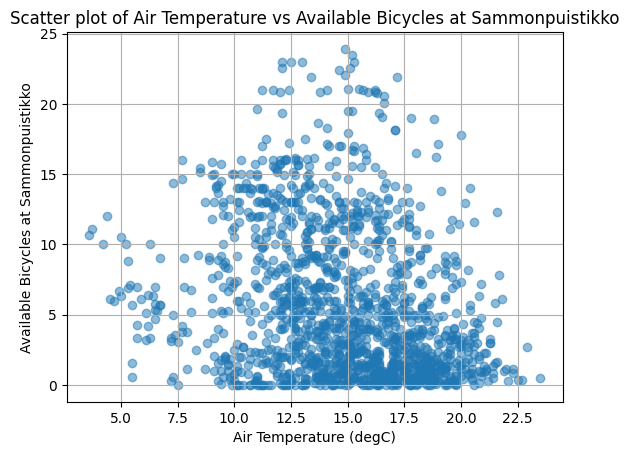

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Creating a figure and axis
fig, ax = plt.subplots()

# Scatter plot
ax.scatter(merged_data['air temperature (degC)'], merged_data['Sammonpuistikko'], alpha=0.5)

# Setting title and labels
ax.set_title('Scatter plot of Air Temperature vs Available Bicycles at Sammonpuistikko')
ax.set_xlabel('Air Temperature (degC)')
ax.set_ylabel('Available Bicycles at Sammonpuistikko')

# Showing grid
ax.grid(True)

# Displaying the plot
plt.show()

So as I am learning and understanding then I will make a conclussion approach to this problem:
when we talk about "correlation," we're really just talking about how two things are related. The correlation can be a number between -1 and 1.

**1** means a perfect positive relationship. As one thing goes up, the other thing goes up as well. So if the correlation between temperature and bikes was 1, it would mean that every time the temperature goes up, the number of bikes available goes up too.

**-1** means a perfect negative relationship. As one thing goes up, the other thing goes down. So if the correlation was -1, it would mean that every time the temperature goes up, the number of bikes available goes down.

**0** means no relationship at all. The two things don't seem to affect each other.

Now, since the correlation between temperature and available bicycles at Sammonpuistikko is: -0.256 which is close to zero, it means there's only a weak relationship. It's negative, so when the temperature goes up, the number of bikes available tends to go down, but not very strongly.

So in other words I would say that in this data case: when it's warmer, there are slightly fewer bikes available at Sammonpuistikko, but it's not a big difference.


## Problem 5. Gitlab (part 2/2)

Your task is to explore what kind of data is freely available for you in the LabraNet GitLab, and then clearly summarize / visualize the results.

**Please note:** Again, this problem is supposed to be hard. Harri doesn't know the answers in advance. Please do your best in trying to help Harri to better understand the GitLab data available for anyone with a user account.

### a) Initial instructions

Create a personal GitLab access token: `User Settings --> Access Tokens --> Add new token`

  + Freely choose the name for the token (e.g. *dan fall 24*, it's for you only).
  + The same goes for the expiration date (one can always delete old tokens and create new ones if needed).

Choose the `api` scope (the topmost one).

Create the token and save it for yourself. Do not share your token to anyone (including Harri)!

### b) Test code

Below is a code snippet that should work for you too. The API documentation is [here](https://python-gitlab.readthedocs.io). See especially the [Getting Started with the API](https://python-gitlab.readthedocs.io/en/stable/api-usage.html) and [API Examples](https://python-gitlab.readthedocs.io/en/stable/api-objects.html) sections.

```python

'''
- initiate a gitlab api instance
- having the token hard-coded is a bad habit, please don't include in your handin
- see <tt>public/exrc_03/exrc_03_theory.ipynb</tt> for a better way

'''
gl = gitlab.Gitlab(
    'https://gitlab.labranet.jamk.fi',
    private_token='COPY_YOUR_PRIVATE_TOKEN_HERE'
)

# authenticate
gl.auth()

# get some of the projects available to you
projects = gl.projects.list()

# (to get all the projects, see documentation)

# print the results
for project in projects:
    print(project)
```

### c) Exercise template (AI-generated & modified):

1. **Setup and Authentication**:

- Use python-gitlab to connect to the GitLab instance.
- Ensure you have a personal access token for accessing public data.

2. **Data Collection**:

- Use the python-gitlab API to fetch e.g.:

  - List of public projects and their details.
  - Public groups and user information.

3. **Data Preparation**:

- Use pandas to organize the data into DataFrames.
- Clean and preprocess the data (handle missing values, parse dates, etc.).

4. **Exploratory Data Analysis (EDA)**:

- Analyze the distribution of projects, contributions, and group memberships.
- Identify the most popular projects based on stars and forks.

5. **Visualization**:

- Use matplotlib or seaborn to create visualizations:
  - Histograms of project counts, star counts, and forks.
  - Analysis of user activity (commits, issues, etc.).

6. **Insights and Conclusion**:

- Summarize your findings.
- Discuss any interesting trends or outliers observed in the data.



<h3 style="color: green;">Problem 5. Solution GitLab (part2/2)</h3>

#### a) Done in GitLab

#### b) Test code - Testing own authentication

In [1]:
%pip install --user python-gitlab python-dotenv

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Authentication and Token Access
from dotenv import dotenv_values
import gitlab

# Loading the token from my .env file
token_path = '/home/XXXXX/env/token.env'  
mytoken = dotenv_values(token_path)['GITLAB_TOKEN']

# Connect to the GitLab instance
gl = gitlab.Gitlab(
    'https://gitlab.labranet.jamk.fi',
    private_token=mytoken
)

# Authenticate
gl.auth()

### c) Exercise template (AI-generated & modified):

##### 1. Setup and Authentication:

In [10]:
# Authentication and Token Access
from dotenv import dotenv_values
import gitlab

# Loading the token from my .env file
token_path = '/home/XXXXX/env/token.env'  
mytoken = dotenv_values(token_path)['GITLAB_TOKEN']

# Connecting to the GitLab instance
gl = gitlab.Gitlab(
    'https://gitlab.labranet.jamk.fi',
    private_token=mytoken
)

# Authenticating
gl.auth()

##### 2. Data Collection:

In [11]:
# Fetching projects, groups, and users
projects = gl.projects.list(iterator=True)
groups = gl.groups.list(iterator=True)
users = gl.users.list(iterator=True)

# Storing the projects, groups, and user details in lists
project_details = []
group_details = []
user_details = []

# Initializing counters for projects, groups, and users
project_counter = 0
group_counter = 0
user_counter = 0

# Limiting to 1000 projects
for project in projects:
    if project_counter < 1000:
        # Fetching the full project details using project ID
        project_full = gl.projects.get(project.id)
        
        # Checking if forks_count is available, fallback to None if not
        forks = getattr(project_full, 'forks_count', None)
        
        # Appending project details to the list
        project_details.append({
            'name': project_full.name,
            'stars': project_full.star_count,
            'forks': forks,
            'last_activity': project_full.last_activity_at,
        })
        project_counter += 1
    else:
        break

# Limiting to 1000 groups with full group details
for group in groups:
    if group_counter < 1000:
        # Fetching full group details
        group_full = gl.groups.get(group.id)  # Get full group details
        
        # Appending group details to the list
        group_details.append({
            'name': group_full.name,
            'projects_count': group_full.projects_count if hasattr(group_full, 'projects_count') else None
        })
        group_counter += 1
    else:
        break

# Limiting to 1000 users
for user in users:
    if user_counter < 1000:
        user_details.append({
            'username': user.username,
            'projects_created': len(user.projects.list())
        })
        user_counter += 1
    else:
        break

# Output to verify
print(f"Collected {len(project_details)} projects.")
print(f"Collected {len(group_details)} groups.")
print(f"Collected {len(user_details)} users.")

Collected 1000 projects.
Collected 0 groups.
Collected 1000 users.


##### Note
Since part of the task 2. Data collection is requiring to list already now details of the fetched data before even point 3. Data preparation then I will show a list of first few projects, groups and users details in order to no overwhelm the terminal.

In [12]:
# Listing the first few projects (up to 5)
print("\nSample of Public Projects and their details:")
for i, project in enumerate(project_details[:5]):  # Limiting to first 5 for display
    print(f"Project {i + 1}:")
    print(f"Name: {project['name']}")
    print(f"Stars: {project['stars']}")
    print(f"Forks: {project['forks']}")
    print(f"Last Activity: {project['last_activity']}")
    print("-" * 40)

# Listing the first few users (up to 5)
print("\nSample of Public Users and their details:")
for i, user in enumerate(user_details[:5]):  # Limiting to first 5 for display
    print(f"User {i + 1}:")
    print(f"Username: {user['username']}")
    print(f"Projects Created: {user['projects_created']}")
    print("-" * 40)

# Handling empty group case
if len(group_details) > 0:
    print("\nSample of Public Groups and their details:")
    for i, group in enumerate(group_details[:5]):  # Limiting to first 5 for display
        print(f"Group {i + 1}:")
        print(f"Name: {group['name']}")
        print(f"Projects Count: {group['projects_count']}")
        print("-" * 40)
else:
    print("\nNo groups were fetched.")


Sample of Public Projects and their details:
Project 1:
Name: Datan analysointi ja visualisointi harjoitukset
Stars: 0
Forks: 0
Last Activity: 2024-10-15T16:18:07.652+03:00
----------------------------------------
Project 2:
Name: Conditions Exercise 3
Stars: 0
Forks: 0
Last Activity: 2024-10-14T20:03:33.901+03:00
----------------------------------------
Project 3:
Name: Variables Exercise 2
Stars: 0
Forks: 0
Last Activity: 2024-10-14T17:08:06.157+03:00
----------------------------------------
Project 4:
Name: docker-image
Stars: 0
Forks: 0
Last Activity: 2024-10-10T21:12:44.717+03:00
----------------------------------------
Project 5:
Name: mkdocs-lightgallery-v2
Stars: 0
Forks: 0
Last Activity: 2024-10-10T14:19:09.763+03:00
----------------------------------------

Sample of Public Users and their details:
User 1:
Username: AG5112
Projects Created: 0
----------------------------------------
User 2:
Username: AG2879
Projects Created: 0
----------------------------------------
User 3:

##### 3. Data Preparation:

I did not fetch groups due that I did not find public groups. This may be due to my user permissions or any other API restrictions.. still I am going to stick to what was required in the task point 3. Data preåaration, also applying it to groups although for my "permissions case" or API case may not output anything.

In [14]:
import pandas as pd

# Creating DataFrames from the collected data
df_projects = pd.DataFrame(project_details)
df_groups = pd.DataFrame(group_details)
df_users = pd.DataFrame(user_details)

# --------------------------
# Data Cleaning for Projects
# --------------------------

# Dropping rows with missing values in the 'projects' DataFrame
df_projects.dropna(inplace=True)

# Converting 'last_activity' to datetime with utc=True
df_projects['last_activity'] = pd.to_datetime(df_projects['last_activity'], errors='coerce', utc=True)

# Dropping any rows where 'last_activity' couldn't be converted to a valid date
df_projects.dropna(subset=['last_activity'], inplace=True)

# -------------------------
# Data Cleaning for Groups
# -------------------------

# Checking if 'projects_count' column exists before cleaning
if 'projects_count' in df_groups.columns:
    # Ensuring 'projects_count' is a valid number
    # Dropping rows with missing or negative values in 'projects_count'
    df_groups.dropna(subset=['projects_count'], inplace=True)
    df_groups = df_groups[df_groups['projects_count'] >= 0]
else:
    print("Warning: 'projects_count' column is missing from the group data.")

# -------------------------
# Data Cleaning for Users
# -------------------------

# Ensuring 'projects_created' is a valid number
# Dropping rows with missing or negative values in 'projects_created'
df_users.dropna(subset=['projects_created'], inplace=True)
df_users = df_users[df_users['projects_created'] >= 0]

# Optionally, reset the index after cleaning
df_projects.reset_index(drop=True, inplace=True)
df_groups.reset_index(drop=True, inplace=True)
df_users.reset_index(drop=True, inplace=True)

# Check results after cleaning
print("Cleaned Projects Data:")
print(df_projects.head())

print("Cleaned Groups Data:")
print(df_groups.head())

print("Cleaned Users Data:")
print(df_users.head())

Cleaned Projects Data:
                                              name  stars  forks  \
0  Datan analysointi ja visualisointi harjoitukset      0    0.0   
1                            Conditions Exercise 3      0    0.0   
2                             Variables Exercise 2      0    0.0   
3                                     docker-image      0    0.0   
4                           mkdocs-lightgallery-v2      0    0.0   

                     last_activity  
0 2024-10-15 13:18:07.652000+00:00  
1 2024-10-14 17:03:33.901000+00:00  
2 2024-10-14 14:08:06.157000+00:00  
3 2024-10-10 18:12:44.717000+00:00  
4 2024-10-10 11:19:09.763000+00:00  
Cleaned Groups Data:
Empty DataFrame
Columns: []
Index: []
Cleaned Users Data:
  username  projects_created
0   AG5112                 0
1   AG2879                 0
2   AG1905                 0
3   AG4619                 0
4   AC2348                 0


##### 4. Exploratory Data Analysis (EDA):

In [15]:
# Displaying a summary of the projects DataFrame
df_projects.describe()

,stars,forks
count,990.000000,990.000000
mean,0.037374,1.236364
std,0.294227,18.122287
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,6.000000,452.000000


In [17]:
# Display a summary of the Users dataframe
df_users.describe()

,projects_created
count,1000.00000
mean,0.11900
std,0.53397
min,0.00000
25%,0.00000
50%,0.00000
75%,0.00000
max,7.00000


In [21]:
# Check available columns in df_projects
print(df_projects.columns)

Index(['name', 'stars', 'forks', 'last_activity', 'year'], dtype='object')


In [23]:
# Check available columns in df_users
print(df_users.columns)

Index(['username', 'projects_created'], dtype='object')


In [24]:
# Most popular projects by stars
popular_projects = df_projects[['name', 'stars', 'forks']].sort_values(by='stars', ascending=False).head(10)
print("\033[1m\nTop 10 Most Popular Projects by Stars:\033[0m")
print(popular_projects.to_string(index=False))

# Most popular projects by forks
popular_forks = df_projects[['name', 'stars', 'forks']].sort_values(by='forks', ascending=False).head(10)
print("\033[1m\nTop 10 Most Popular Projects by Forks:\033[0m")
print(popular_forks.to_string(index=False))

# Activity trends: Number of projects created over time
df_projects['year'] = df_projects['last_activity'].dt.year
projects_per_year = df_projects['year'].value_counts().sort_index()

print("\033[1m\nNumber of Projects Created Over Time (by Year):\033[0m")
print(projects_per_year)

# Most active users
most_active_users = df_users[['username', 'projects_created']].sort_values(by='projects_created', ascending=False).head(10)
print("\033[1m\nTop 10 Most Active Users by Projects Created:\033[0m")
print(most_active_users.to_string(index=False))

# Summary message
print("\033[1m\nSummary of Findings:\033[0m")
print(f"- The most popular project by stars is '{popular_projects.iloc[0]['name']}' with {popular_projects.iloc[0]['stars']} stars.")
print(f"- The most popular project by forks is '{popular_forks.iloc[0]['name']}' with {popular_forks.iloc[0]['forks']} forks.")
print(f"- The most active user is '{most_active_users.iloc[0]['username']}' with {most_active_users.iloc[0]['projects_created']} projects created.")


Top 10 Most Popular Projects by Stars:
                               name  stars  forks
        Object-oriented Programming      6    0.0
                               core      4    2.0
         Järjestelmien Ylläpito k23      3    3.0
                           CSE-2023      2    0.0
                       Ohjelmointi1      1    2.0
Ttv Tic OPS2024 Course Descriptions      1    0.0
                            TTC2030      1    0.0
       Advanced Programming Project      1    2.0
                  Web-Visualization      1    0.0
                           cse-2022      1    1.0

Top 10 Most Popular Projects by Forks:
                                           name  stars  forks
                                        ttc2060      0  452.0
                 DSA Assignments in Spring 2024      0  314.0
                   data-preprocessing-exercises      0  106.0
                           Full Stack Exercises      0   74.0
                     Koneoppiminen Harjoitukset      0   37.

##### 5. Visualization:

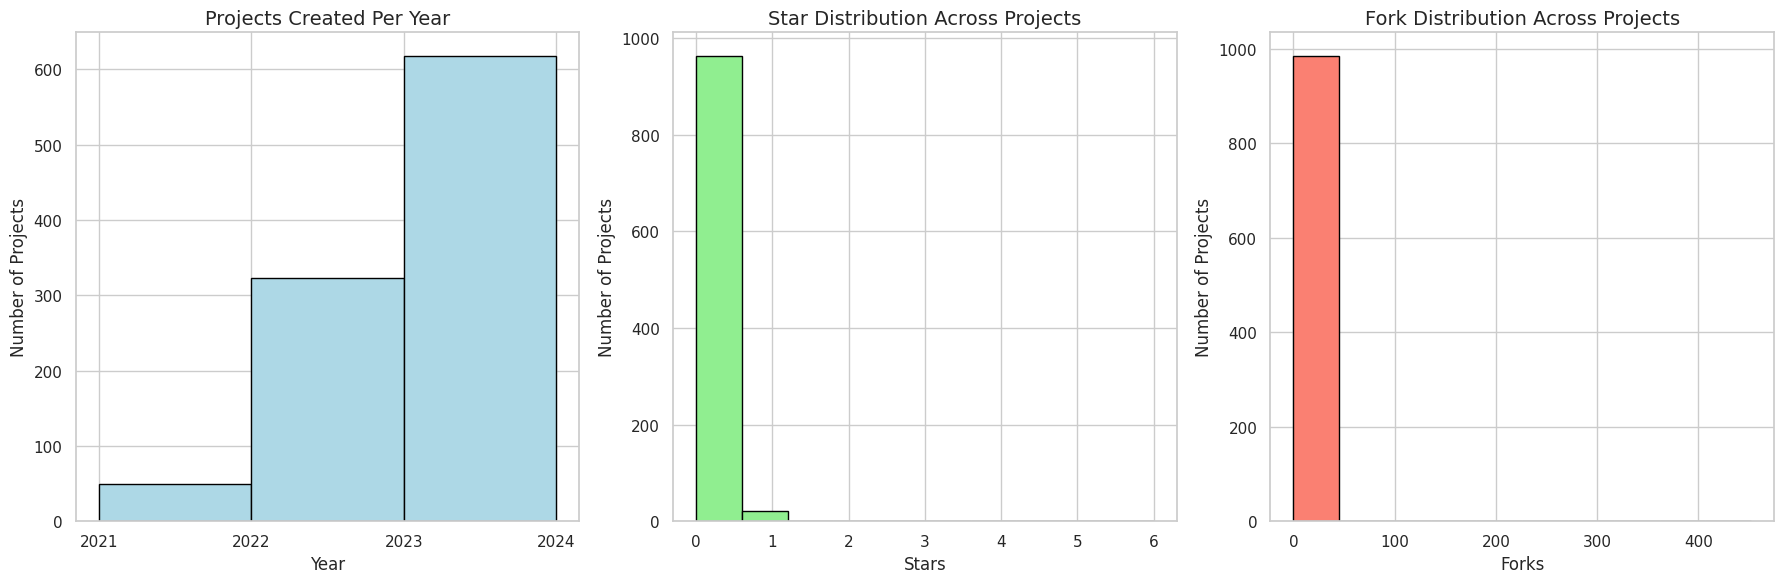

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting Seaborn style for better aesthetics
sns.set(style='whitegrid')

# Creating subplots for histograms (1 row, 3 columns)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6), tight_layout=True)

# Histogram for project counts per year (labeling years int instead)
ax1.hist(df_projects['year'], bins=range(int(df_projects['year'].min()), int(df_projects['year'].max()) + 1), color='lightblue', edgecolor='black')
ax1.set_title('Projects Created Per Year', fontsize=14)
ax1.set_xlabel('Year', fontsize=12)
ax1.set_ylabel('Number of Projects', fontsize=12)
ax1.set_xticks(range(int(df_projects['year'].min()), int(df_projects['year'].max()) + 1))  # Ensuring only whole years are displayed

# Histogram for star counts
ax2.hist(df_projects['stars'], bins=10, color='lightgreen', edgecolor='black')
ax2.set_title('Star Distribution Across Projects', fontsize=14)
ax2.set_xlabel('Stars', fontsize=12)
ax2.set_ylabel('Number of Projects', fontsize=12)

# Histogram for fork counts
ax3.hist(df_projects['forks'], bins=10, color='salmon', edgecolor='black')
ax3.set_title('Fork Distribution Across Projects', fontsize=14)
ax3.set_xlabel('Forks', fontsize=12)
ax3.set_ylabel('Number of Projects', fontsize=12)

# Showing the histograms
plt.show()

##### Improving the Histograms for Star and Fork Counts
The current star and fork histograms might not be very meaningful because:
If there are many zeros or very low values, these dominate the histogram, making it hard to interpret the distributions.

**Solutions to Improve Them:**

**Option 1: Logarithmic Scale for Better Visualization**
If the distribution of stars or forks is highly skewed (i.e., many projects have few stars or forks, while a few projects have very high counts), we can apply a logarithmic scale. This will spread out the values better and make the distribution clearer. Let´s see if we can get a more meaningful histagram for star and fork counts

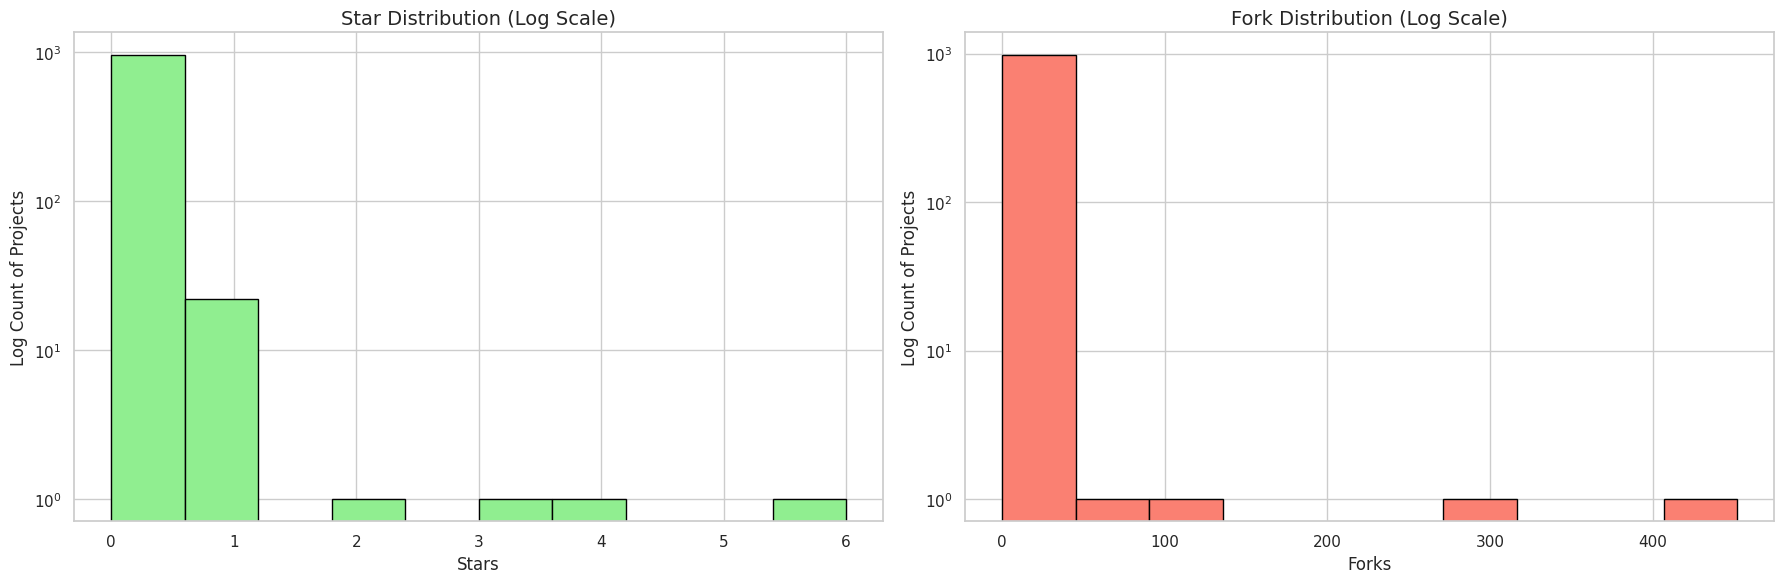

In [31]:
# Creating subplots for histograms (1 row, 3 columns)
fig, (ax2, ax3) = plt.subplots(1, 2, figsize=(18, 6), tight_layout=True)

# Option 1: Log scale for star and fork counts
ax2.hist(df_projects['stars'], bins=10, color='lightgreen', edgecolor='black', log=True)
ax2.set_title('Star Distribution (Log Scale)', fontsize=14)
ax2.set_xlabel('Stars', fontsize=12)
ax2.set_ylabel('Log Count of Projects', fontsize=12)

ax3.hist(df_projects['forks'], bins=10, color='salmon', edgecolor='black', log=True)
ax3.set_title('Fork Distribution (Log Scale)', fontsize=14)
ax3.set_xlabel('Forks', fontsize=12)
ax3.set_ylabel('Log Count of Projects', fontsize=12)

# Show the histograms
plt.show()

**Note**
- By applying log=True in ax2.hist() and ax3.hist(), we make it easier to see patterns even if there are very few projects with large star or fork counts.
- This helps distribute values more evenly and avoids the issue where only a few bins dominate the entire histogram.

**Option 2: Removing Projects with Zero Stars or Forks**
To see how the distribution of stars or forks looks after **excluding projects with zero** stars or forks (since these might dominate the dataset), we can filter the data. Let´s see the histagrams with this option 2.

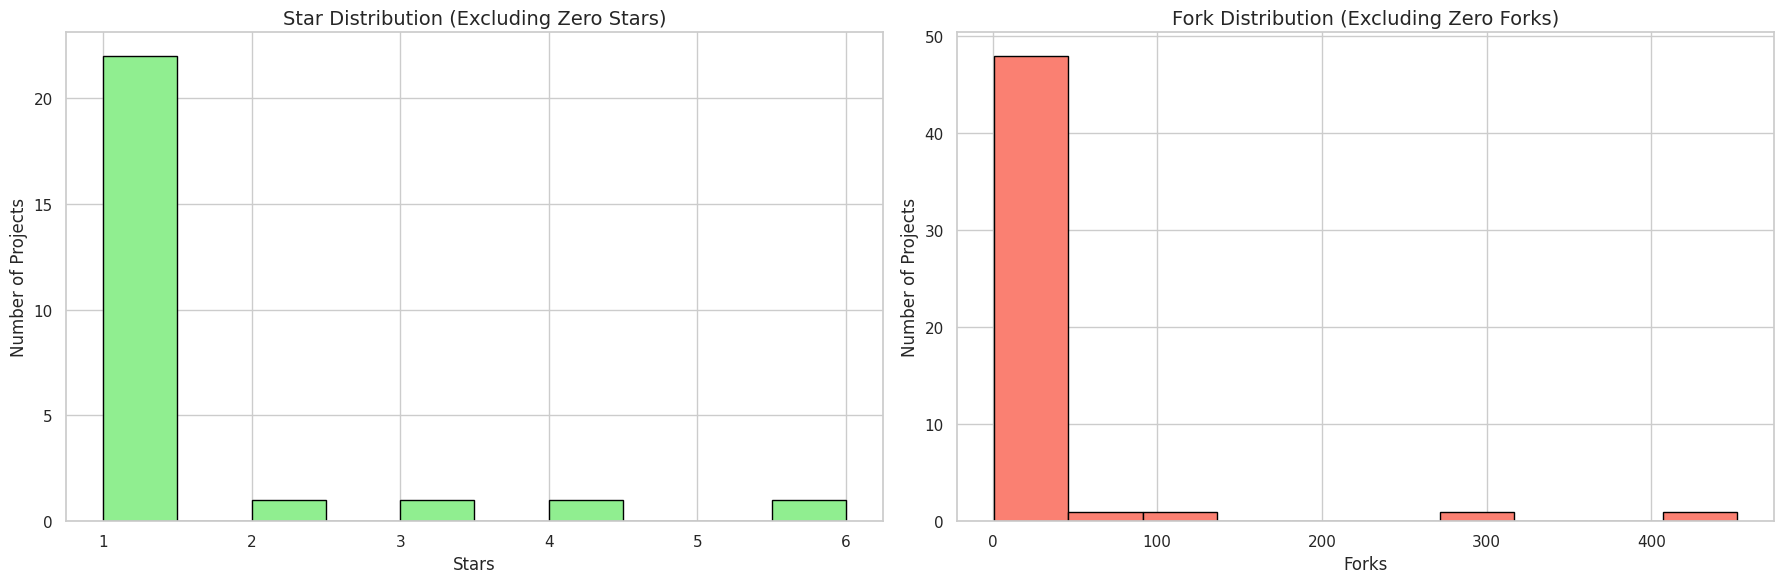

In [34]:
# Option 2: Exclude zero star and fork counts
# Creating subplots for histograms (1 row, 3 columns)
fig, (ax2, ax3) = plt.subplots(1, 2, figsize=(18, 6), tight_layout=True)

# Filter out projects with zero stars or forks
non_zero_stars = df_projects[df_projects['stars'] > 0]
non_zero_forks = df_projects[df_projects['forks'] > 0]

# Histogram for non-zero star counts
ax2.hist(non_zero_stars['stars'], bins=10, color='lightgreen', edgecolor='black')
ax2.set_title('Star Distribution (Excluding Zero Stars)', fontsize=14)
ax2.set_xlabel('Stars', fontsize=12)
ax2.set_ylabel('Number of Projects', fontsize=12)

# Histogram for non-zero fork counts
ax3.hist(non_zero_forks['forks'], bins=10, color='salmon', edgecolor='black')
ax3.set_title('Fork Distribution (Excluding Zero Forks)', fontsize=14)
ax3.set_xlabel('Forks', fontsize=12)
ax3.set_ylabel('Number of Projects', fontsize=12)

# Show the histograms
plt.show()

**Note**
This solution excludes projects that have zero stars or forks, allowing us to focus on projects that actually received some recognition (stars or forks).
It will provide a better sense of the distribution for projects with meaningful star or fork counts.

I would say that for improving the Histograms for Star and Fork Counts, I would stick with the 2nd option which removes projects with zero starts or forks. I think this 2nd solution option is makes the most sense based on the data I have.

#### Analysis of User Activity (Projects Created)

For this part of the problem I will be showing a horizontal bar chart of the most active users based on the number of projects created.

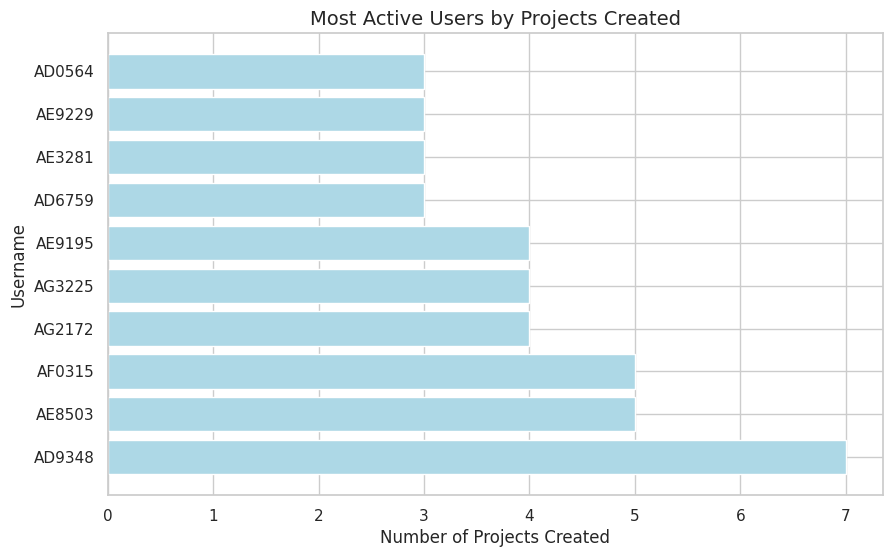

In [41]:
# User activity based on projects created
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting a horizontal bar chart for the number of projects created by users
ax.barh(most_active_users['username'], most_active_users['projects_created'], color='lightblue')
ax.set_title('Most Active Users by Projects Created', fontsize=14)
ax.set_xlabel('Number of Projects Created', fontsize=12)
ax.set_ylabel('Username', fontsize=12)

# Showing the plot
plt.show()

#### Plotting with seaborn same result but more stylized plot with seaborn.

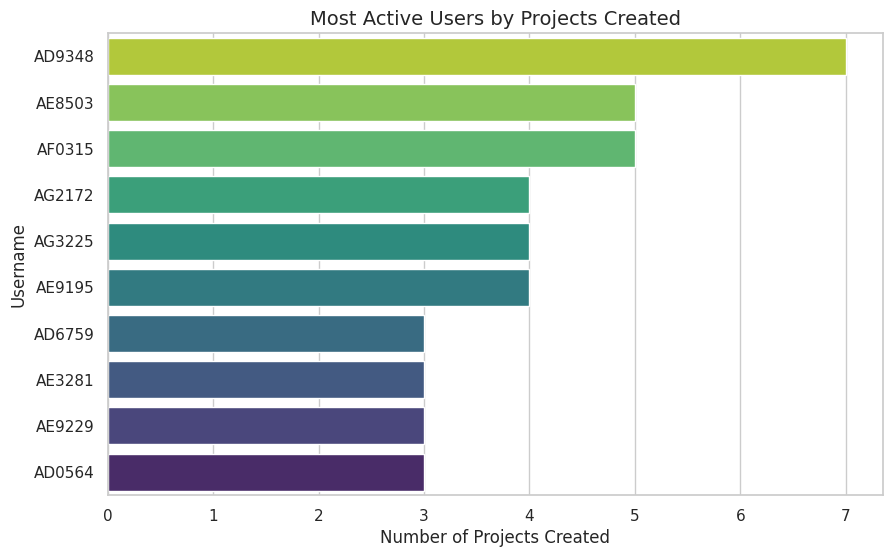

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data
usernames = most_active_users['username']
projects_created = most_active_users['projects_created']

sns.set_theme(style="whitegrid")

fig, ax = plt.subplots(figsize=(10, 6))

# Plotting with seaborn using the 'viridis' palette reversed
palette = sns.color_palette("viridis", n_colors=len(usernames))[::-1]
sns.barplot(y=usernames, x=projects_created, palette=palette, ax=ax, hue=usernames, dodge=False, legend=False)

ax.set_title('Most Active Users by Projects Created', fontsize=14)
ax.set_xlabel('Number of Projects Created', fontsize=12)
ax.set_ylabel('Username', fontsize=12)

plt.show()

#### 6. Insights and Conclusion:

Problem 5 was quite challenging, but I successfully completed all aspects of the task and gained valuable insights into exploring GitLab data. After setting up the API and fetching data using the python-gitlab library, I successfully collected data for 1000 projects and 1000 users, although no public groups were retrieved. This could be due to access restrictions or API limitations, which may need further investigation.

During the exploration, I analyzed project details such as stars, forks, and last activity. The most popular projects were identified based on star and fork counts. Additionally, I explored user activity by counting the number of projects created by each user.

For data cleaning, I handled missing values and converted columns like last_activity to ensure consistent data. While the absence of group data limited some analyses, the project and user data provided valuable insights into trends like project popularity and active user contributions.

**Visualizations and Findings**
Using Seaborn and Matplotlib (object-oriented approach), I created visualizations to display the distribution of stars, forks, and user contributions. These visualizations revealed patterns in project activity over time and highlighted popular repositories.

In conclusion, despite some challenges, such as missing group data and large project datasets, this task improved my understanding of API-based data exploration and visualization. AI support was particularly helpful in clarifying the API usage and tackling more complex parts of the task. As a student, I enjoyed experimenting with Seaborn for cleaner visual representations and aim to continue refining my data analysis skills.

**Understanding the GitLab Data**
The GitLab API provides valuable access to public project data, including stars, forks, and activity, which can be used to analyze project popularity and trends. User data reveals the number of projects each user has created, offering insights into community engagement. However, group data access seems limited, likely due to permissions or visibility settings, we may need need to verify whether the account or token has the right scope for group-level data, so this may require further investigation or scope adjustments for full access.